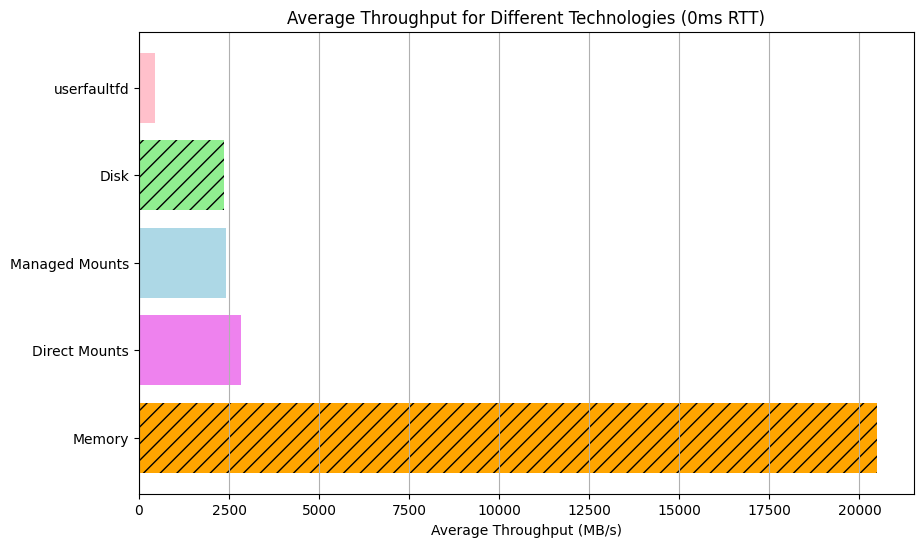

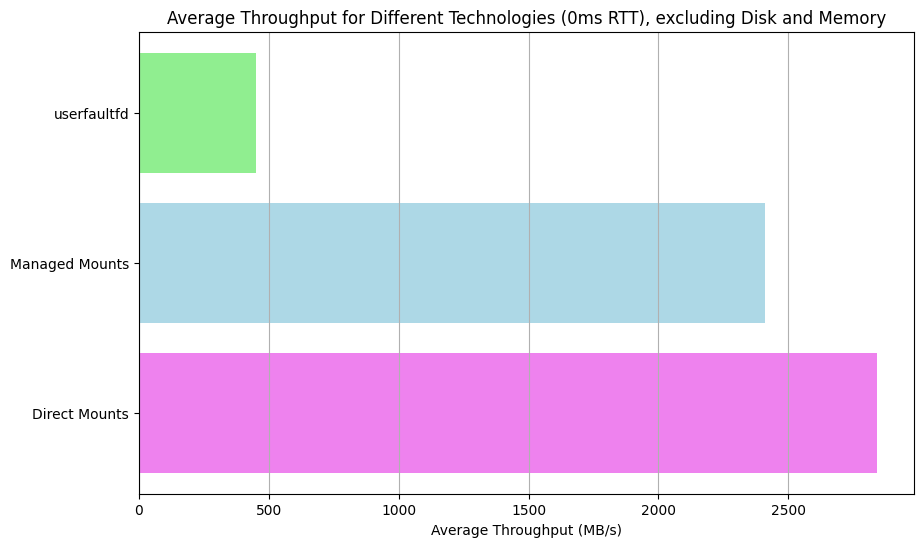

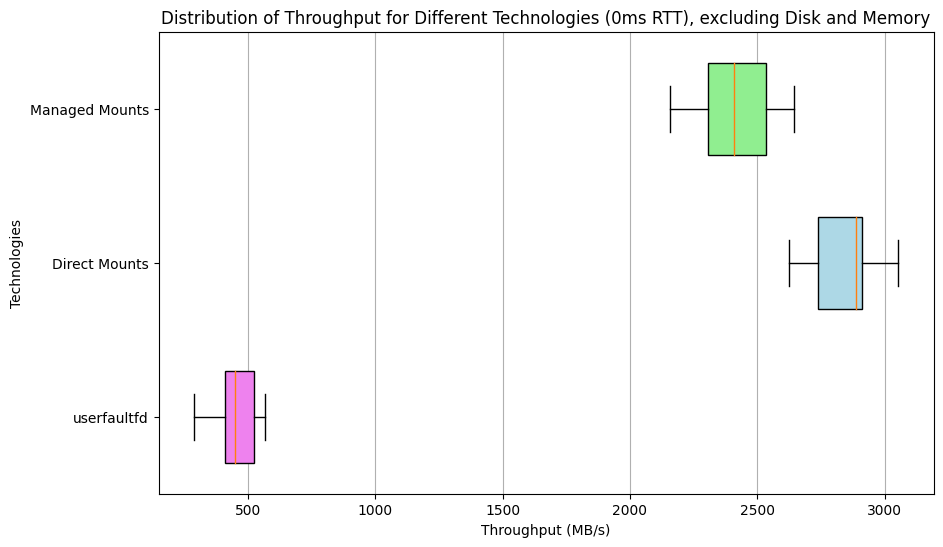

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../bench/throughput-rtt0/results.csv')

# Rename the columns
data.columns = [col.replace("Throughput for ", "").replace(" (0ms RTT) (MB/s)", "") for col in data.columns]

# Calculate and sort the average throughput for each technology
avg_throughput = data.mean().sort_values(ascending=False)

# Create a color scheme
colors = ['orange', 'violet', 'lightblue', 'lightgreen', 'pink']

# Create the first bar plot with dotted bars for Disk and Memory
plt.figure(figsize=(10,6))
bars = plt.barh(avg_throughput.index, avg_throughput.values, color=colors)
plt.xlabel('Average Throughput (MB/s)')
plt.title('Average Throughput for Different Technologies (0ms RTT)')
bars[avg_throughput.index.get_loc('Disk')].set_hatch('//')
bars[avg_throughput.index.get_loc('Memory')].set_hatch('//')
plt.grid(axis='x')
plt.show()

# Exclude "Disk" and "Memory" from the data
data_excluding_disk_memory = data.drop(columns=["Disk", "Memory"])

# Calculate and sort the average throughput for the remaining technologies
avg_throughput_excluding_disk_memory = data_excluding_disk_memory.mean().sort_values(ascending=False)

# Create a new color scheme for the remaining technologies
colors_excluding_disk_memory = ['violet', 'lightblue', 'lightgreen']

# Create the second bar plot
plt.figure(figsize=(10,6))
plt.barh(avg_throughput_excluding_disk_memory.index, avg_throughput_excluding_disk_memory.values, color=colors_excluding_disk_memory)
plt.xlabel('Average Throughput (MB/s)')
plt.title('Average Throughput for Different Technologies (0ms RTT), excluding Disk and Memory')
plt.grid(axis='x')
plt.show()

# Create a horizontal boxplot for the data excluding Disk and Memory
plt.figure(figsize=(10,6))
boxplot = plt.boxplot(data_excluding_disk_memory.values, patch_artist=True, widths=0.6, vert=False)
for patch, color in zip(boxplot['boxes'], colors_excluding_disk_memory):
    patch.set_facecolor(color)
plt.title('Distribution of Throughput for Different Technologies (0ms RTT), excluding Disk and Memory')
plt.ylabel('Technologies')
plt.xlabel('Throughput (MB/s)')
plt.yticks([1, 2, 3], data_excluding_disk_memory.columns)
plt.grid(axis='x')
plt.show()